In [1]:
# Data Analysis
   
import pandas as pd
import numpy as np
import os 
import missingno as msno
import matplotlib.pyplot as plt

import math
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

    
# Data View
pd.options.display.max_columns = 200

# Import Basic Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

os.chdir('C:\\Users\\jason\\OneDrive\\Desktop\\NCU\\8535_Univariate Analysis\\Week 6')

In [2]:
def missing(df) : 
    missing_number = df.isnull().sum().sort_values(ascending = False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
    missing_values = pd.concat([missing_number, missing_percent], axis = 1, keys = ['Missing_number', 'Missing_percent'])
    return missing_values 

def categorize(df) :
    Quantitive_features = df.select_dtypes([np.number]).columns.tolist()
    Categorical_features = df.select_dtypes(exclude = [np.number]).columns.tolist()
    Discrete_features = [col for col in Quantitive_features if len(df[col].unique()) < 200]
    Continuous_features = [col for col in Quantitive_features if col not in Discrete_features]
    print("Quantitive feautres : {} \nDiscrete features : {} \nContinous features : {} \nCategorical features : {}\n"
     .format(Quantitive_features, Discrete_features, Continuous_features, Categorical_features))
    print("Number of quantitive feautres : {} \nNumber of discrete features : {} \nNumber of continous features : {} \nNumber of categorical features : {}"
     .format(len(Quantitive_features), len(Discrete_features), len(Continuous_features), len(Categorical_features)))
    return Quantitive_features, Categorical_features, Discrete_features, Continuous_features
    
def unique(df) : 
    tb1 = pd.DataFrame({'Columns' : df.columns, 'Number_of_Unique' : df.nunique().values.tolist(),
                       'Sample1' : df.sample(1).values.tolist()[0], 'Sample2' : df.sample(1).values.tolist()[0], 
                       'Sample3' : df.sample(1).values.tolist()[0],
                       'Sample4' : df.sample(1).values.tolist()[0], 'Sample5' : df.sample(1).values.tolist()[0]})
    return tb1
    
def data_glimpse(df) :  
      # Dataset preview 
    print("1. Dataset Preview \n")
    display(df.head())
    print("-------------------------------------------------------------------------------\n")
    
    # Columns imformation
    print("2. Column Imformation \n")
    print("Dataset have {} rows and {} columns".format(df.shape[0], df.shape[1]))
    print("\n") 
    print("Dataset Column name : {}".format(df.columns.values))
    print("\n")
    categorize(df)
    print("-------------------------------------------------------------------------------\n")
    
    # Basic imformation table 
    print("3. Missing data table : \n")
    display(missing(df))
    print("-------------------------------------------------------------------------------\n")
    
    print("4. Number of unique value by column : \n")
    display(unique(df))
    print("-------------------------------------------------------------------------------\n")
    
    print("5. Describe table : \n")
    display(df.describe())
    print("-------------------------------------------------------------------------------\n")
    
    print(df.info())
    print("-------------------------------------------------------------------------------\n")

In [3]:
df_raw= pd.read_csv(r"C:\Users\jason\OneDrive\Desktop\NCU\8535_Univariate Analysis\Week 6\real_estate_inventory.csv")

In [4]:
data_glimpse(df_raw)

1. Dataset Preview 



,date,type,year_built,bathrooms,bedrooms,state,price,hvac,hardwood_floors,fireplace,squareft,garage,acreage,purchased
0,6/23/2021,condo,2005,2,3,NY,212948,1,1,1,1584,0,1.95,1
1,3/20/2022,condo,2001,1,2,NY,153555,1,0,0,1704,0,2.50,0
2,4/24/2021,townhome,2019,2,3,NJ,206549,1,1,1,2464,1,0.52,0
3,10/31/2021,condo,2019,2,4,PA,330239,1,1,0,1640,0,1.50,1
4,2/9/2022,single family,2000,1,2,NY,157490,1,0,0,2390,0,1.54,1


-------------------------------------------------------------------------------

2. Column Imformation 

Dataset have 5000 rows and 14 columns


Dataset Column name : ['date' 'type' 'year_built' 'bathrooms' 'bedrooms' 'state' 'price' 'hvac'
 'hardwood_floors' 'fireplace' 'squareft' 'garage' 'acreage' 'purchased']


Quantitive feautres : ['year_built', 'bathrooms', 'bedrooms', 'price', 'hvac', 'hardwood_floors', 'fireplace', 'squareft', 'garage', 'acreage', 'purchased'] 
Discrete features : ['year_built', 'bathrooms', 'bedrooms', 'hvac', 'hardwood_floors', 'fireplace', 'garage', 'purchased'] 
Continous features : ['price', 'squareft', 'acreage'] 
Categorical features : ['date', 'type', 'state']

Number of quantitive feautres : 11 
Number of discrete features : 8 
Number of continous features : 3 
Number of categorical features : 3
-------------------------------------------------------------------------------

3. Missing data table : 



,Missing_number,Missing_percent
date,0,0.0
type,0,0.0
year_built,0,0.0
bathrooms,0,0.0
bedrooms,0,0.0
state,0,0.0
price,0,0.0
hvac,0,0.0
hardwood_floors,0,0.0
fireplace,0,0.0


-------------------------------------------------------------------------------

4. Number of unique value by column : 



,Columns,Number_of_Unique,Sample1,Sample2,Sample3,Sample4,Sample5
0,date,485,1/23/2021,5/19/2021,9/11/2021,8/20/2021,2/9/2022
1,type,3,condo,townhome,townhome,single family,townhome
2,year_built,12,1985,1998,2000,1985,1985
3,bathrooms,2,1,1,1,2,1
4,bedrooms,4,3,2,3,3,4
5,state,3,PA,NY,PA,PA,NY
6,price,4656,214351,155659,216402,203885,326009
7,hvac,2,1,0,1,0,0
8,hardwood_floors,2,1,1,0,0,1
9,fireplace,2,1,1,0,0,0


-------------------------------------------------------------------------------

5. Describe table : 



,year_built,bathrooms,bedrooms,price,hvac,hardwood_floors,fireplace,squareft,garage,acreage,purchased
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2006.495200,1.499200,2.516400,201313.088600,0.602400,0.702200,0.483800,1755.008400,0.49980,2.743238,0.498000
std,10.824297,0.500049,1.119099,80966.691576,0.489451,0.457337,0.499787,436.764217,0.50005,1.324089,0.500046
min,1985.000000,1.000000,1.000000,106785.000000,0.000000,0.000000,0.000000,1000.000000,0.00000,0.500000,0.000000
25%,1998.000000,1.000000,2.000000,150254.250000,0.000000,0.000000,0.000000,1368.000000,0.00000,1.570000,0.000000
50%,2005.000000,1.000000,3.000000,199386.500000,1.000000,1.000000,0.000000,1753.000000,0.00000,2.720000,0.000000
75%,2016.000000,2.000000,4.000000,311833.500000,1.000000,1.000000,1.000000,2142.000000,1.00000,3.902500,1.000000
max,2020.000000,2.000000,4.000000,352219.000000,1.000000,1.000000,1.000000,2500.000000,1.00000,5.000000,1.000000


-------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             5000 non-null   object 
 1   type             5000 non-null   object 
 2   year_built       5000 non-null   int64  
 3   bathrooms        5000 non-null   int64  
 4   bedrooms         5000 non-null   int64  
 5   state            5000 non-null   object 
 6   price            5000 non-null   int64  
 7   hvac             5000 non-null   int64  
 8   hardwood_floors  5000 non-null   int64  
 9   fireplace        5000 non-null   int64  
 10  squareft         5000 non-null   int64  
 11  garage           5000 non-null   int64  
 12  acreage          5000 non-null   float64
 13  purchased        5000 non-null   int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 547.0+ KB
None
------

In [5]:
#create new variable for with month
from datetime import datetime as dt
df_raw["date"] = pd.to_datetime(df_raw['date']).dt.to_period('D')
df_raw['month'] = df_raw["date"].dt.month

In [6]:
#rename the levels in 'type' for townhome, condo single family
type = {'townhome': 0,'condo': 1, 'single family':2}
df_raw.type = [type[item] for item in df_raw.type]
#rename the levels in 'state' for NY, NJ, PA
state = {'NY': 0,'NJ': 1, 'PA':2}
df_raw.state = [state[item] for item in df_raw.state]

In [7]:
#Normalize using Min Max Transform for price, squareft, and acreage

from sklearn import preprocessing
normvar = df_raw[["price", "squareft", "acreage"]]
d = preprocessing.normalize(normvar,axis=0)
scaled_df = pd.DataFrame(d, columns=["price_n", "squareft_n", "acreage_n"])
df_norm = pd.concat([df_raw, scaled_df], axis=1)

Text(0, 0.5, 'Frequency')

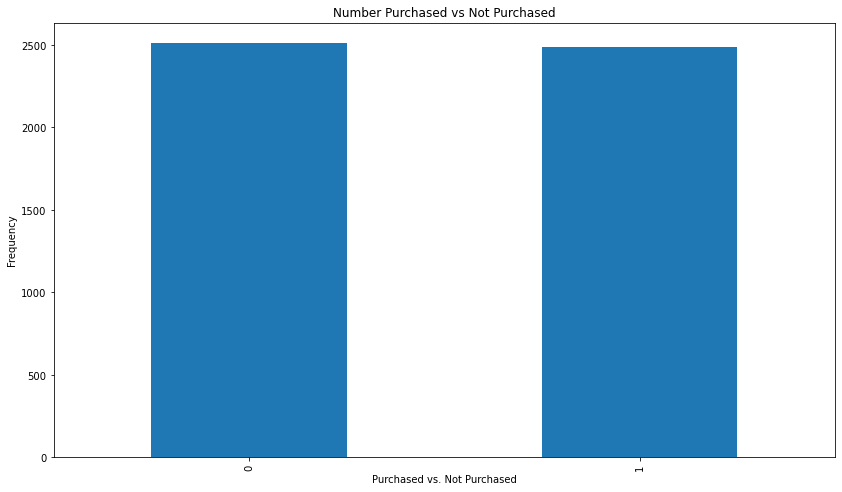

In [8]:
#Barplot for puchased vs not purchased
ax = df_norm['purchased'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number Purchased vs Not Purchased")
ax.set_xlabel("Purchased vs. Not Purchased")
ax.set_ylabel("Frequency")

In [9]:
#Creating training and testing data
X = df_norm.drop(['price', 'squareft', 'acreage', 'purchased', 'date'], axis=1)
y = df_norm['purchased']

from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [10]:
data = pd.concat([X, y], axis=1)
data.to_csv(r'C:\Users\jason\OneDrive\Desktop\NCU\8535_Univariate Analysis\Week 6\dataset.csv', index = False)

In [11]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
#Evaluate Random Forest with 10-fold CV
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[430 371]
 [456 393]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.49      0.54      0.51       801
           1       0.51      0.46      0.49       849

    accuracy                           0.50      1650
   macro avg       0.50      0.50      0.50      1650
weighted avg       0.50      0.50      0.50      1650



=== All AUC Scores ===
[0.45334325 0.499848   0.49235988 0.44676715 0.499976   0.47934367
 0.47531961 0.51344022 0.5187603  0.48380774]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.486296580745292


In [14]:
from sklearn import metrics

print("acuracy:", metrics.accuracy_score(y_test,rfc_predict))
#precision score
print("precision:", metrics.precision_score(y_test,rfc_predict))
#recall score
print("recall" , metrics.recall_score(y_test,rfc_predict))
print(metrics.classification_report(y_test, rfc_predict))

acuracy: 0.4987878787878788
precision: 0.5143979057591623
recall 0.4628975265017668
              precision    recall  f1-score   support

           0       0.49      0.54      0.51       801
           1       0.51      0.46      0.49       849

    accuracy                           0.50      1650
   macro avg       0.50      0.50      0.50      1650
weighted avg       0.50      0.50      0.50      1650



In [15]:
#Hyperparameter tuning for Random Forest
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 3000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt', 'log2', 'None']

# max depth
max_depth = [int(x) for x in np.linspace(50, 2000, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
{'n_estimators': 50, 'max_features': 'auto', 'max_depth': 1610}


C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.49343284        nan        nan        nan 0.49223881
 0.49761194 0.4958209         nan 0.49373134 0.49283582 0.50149254
        nan 0.49283582        nan 0.49761194 0.4880597  0.50358209
        nan 0.49940299 0.49134328 0.50149254        nan 0.48537313
 0.48835821        nan        nan 0.49223881 0.50179104 0.49850746
        nan 0.49074627 0.5038806         nan 0.49701493        nan
 0.49731343 0.49402985        nan 0.4961194  0.49134328 0.49731343
 0.48985075 0.49432836        nan 0.48835821 0.49134328        nan
        nan 0.49731343        nan 0.48328358 0.49074627        nan
 0.49940299 0.4958209  0.49343284 0.49970149        nan        nan
 0.49134328 0.49373134        nan 0.49223881        nan 0.49283582
 0.48716418 0.49134328        nan 0.49641791        nan        nan
 0.4958209  0.4958209         nan 0.49671642 0.495522

In [16]:
#Run Random forest with tuned hyperparmeters

rfc1 = RandomForestClassifier(n_estimators=50, max_depth=1610, max_features='log2')
rfc1.fit(X_train,y_train)
rfc1_predict = rfc1.predict(X_test)
rfc1_cv_score = cross_val_score(rfc1, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc1_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc1_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc1_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc1_cv_score.mean())

=== Confusion Matrix ===
[[459 342]
 [467 382]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.50      0.57      0.53       801
           1       0.53      0.45      0.49       849

    accuracy                           0.51      1650
   macro avg       0.51      0.51      0.51      1650
weighted avg       0.51      0.51      0.51      1650



=== All AUC Scores ===
[0.50348806 0.4622154  0.49018384 0.47247156 0.51409623 0.48639178
 0.51516024 0.46083137 0.54204867 0.47693563]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.49238227811644986


In [17]:
print("acuracy:", metrics.accuracy_score(y_test,rfc1_predict))
#precision score
print("precision:", metrics.precision_score(y_test,rfc1_predict))
#recall score
print("recall" , metrics.recall_score(y_test,rfc1_predict))
print(metrics.classification_report(y_test, rfc1_predict))

acuracy: 0.5096969696969696
precision: 0.5276243093922652
recall 0.4499411071849234
              precision    recall  f1-score   support

           0       0.50      0.57      0.53       801
           1       0.53      0.45      0.49       849

    accuracy                           0.51      1650
   macro avg       0.51      0.51      0.51      1650
weighted avg       0.51      0.51      0.51      1650

